# Exercise 1: Iris - Simple Linear Regression
* Cho dữ liệu **Iris.xls**.
* Yêu cầu: Thực hiện **Linenear Regression** để xây dựng model từ thuộc tính `pentalwidth` để dự đoán `pentallength`, yêu cầu thực hiện các bước sau:
  1. Đọc dữ liệu và trực quan hóa dữ liệu.
  2. Tạo `X_train`, `y_train`, `X_test`, `y_test` từ hai thuộc tính `pentalwidth` _(input)_ và `pentallength` _(output)_ với tỉ lệ test data là 0.2.
  3. Áp dụng Linear Regression để build model.
  4. Vẽ hình và nhận xét kết quả.
  5. Nếu `pentalwidth` là $1.5$ thì `pentallength` là bao nhiêu?

###### Task 1
**Đọc dữ liệu**

In [1]:
import pandas as pd
import pandas_profiling as pp
from modules.reader_writer import readExcel

In [2]:
iris = readExcel('./data/Iris.xls')

iris.head()

sepallength  sepalwidth  petallength  petalwidth         iris
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [3]:
profile = pp.ProfileReport(iris)
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


**Trực quan hóa**

In [4]:
from modules.drawer import MySeaborn

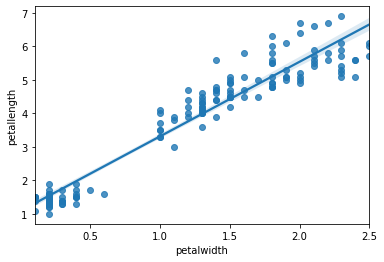

In [5]:
plot = MySeaborn(iris)
plot.regplot('petalwidth', 'petallength')

> **Nhận xét**
> * Hai thuộc tính `petalwidth` và `petallength` tương quan thuận.

/home/manhcuong/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


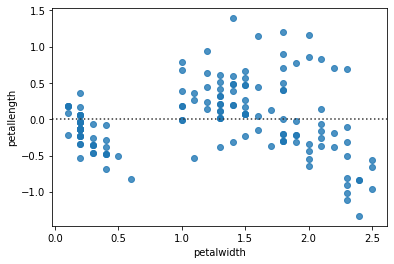

In [6]:
plot.residplot('petalwidth', 'petallength')

> **Nhận xét**
> * Các điểm dữ liệu trải khá đều trên trục $x$ $\Rightarrow$ model dc xây dựng bởi Linear Regression sẽ tương đối phù hợp với dataset này.

###### Task 2

In [7]:
from modules.regression import MySimpleLinearRegression

In [8]:
slr = MySimpleLinearRegression(iris)
slr.createTrainTestData('petalwidth', 'petallength', train_size=.8)

###### Task 3

In [9]:
slr.initModel()

**Áp dụng model để dự đoán với input là _test data_**

In [10]:
y_predict = slr.predict()
y_predict

array([5.75535341, 1.54029339, 6.19904394, 1.98398392, 5.08981762,
       6.19904394, 1.31844813, 1.54029339, 5.08981762, 1.76213866,
       1.76213866, 6.19904394, 1.98398392, 1.54029339, 6.19904394,
       3.9805913 , 3.31505551, 4.86797236, 5.53350815, 5.75535341,
       5.08981762, 1.98398392, 5.31166289, 1.54029339, 3.53690077,
       5.08981762, 4.20243656, 1.54029339, 3.75874604, 6.19904394])

**So sánh giữa _actual value_ và _prediction value_**

In [11]:
slr.compareActualVsPredict().head()

Actual value  Prediction
0           5.6    5.755353
1           1.6    1.540293
2           6.9    6.199044
3           1.5    1.983984
4           4.9    5.089818

**Đánh giá model**

In [12]:
slr.evaluate()

R^2 all  R^2 train  R^2 test       MSE       MAE
0  0.926888   0.926147  0.928913  0.261586  0.405405

> **Nhận xét**
> * Giá trị $R^2$ rất cao, gần 93%, tức giải quyết dc 93% trên toàn bộ dataset, tương tự đối với tập training data và test data cũng rất cao $\Rightarrow$ model này phù hợp

In [13]:
slr.getFormula()

{'intercept': 1.0966028626490547, 'coef': 2.218452643835066}

###### Task 5

In [14]:
X_predict = pd.DataFrame([1.5])
y_predict = slr.predict(X_predict)

y_predict

array([4.42428183])

> **Nhận xét**
> * Với giá trị input `petalwidth` là 1.5 thì model dự đoán `petallength` là $\approx{4.424}$.

###### Task 4

In [15]:
from modules.drawer import visualTrainingTestPredictData

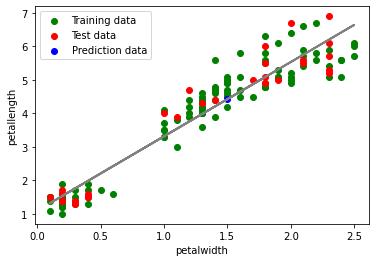

In [16]:
input_ = iris[['petalwidth']]
reg_line = slr.predict(input_)
visualTrainingTestPredictData(input_, reg_line,
slr.train['X'], slr.train['y'], slr.test['X'], slr.test['y'], X_predict, y_predict,
'petalwidth', 'petallength')

> **Nhận xét**
> * Nhìn chung model cho ra kết quả tốt và gần với actual value.